**Trees and tree search**

A directed graph consists of a finite set $N$ of labeled nodes 

$$N = \{ 0,\ldots,n-1\}$$

and a set of arrows/edges $E$ from some nodes to some other nodes.

If there is an arrow starting at node $i$ and terminating at node $j$ we can write this edge as an ordered pair $(i,j)$ and our edge set $E$ can be written as

$$ E= \{ (i_0,j_0),(i_1,j_1),\ldots,(i_{m-1},j_{m-1})\}$$


We disallow

- an edge from a node to itself
- multiple edges with the same starting and terminal node

Here is an pictorial representation of a directed graph with 8 nodes and 13 edges.

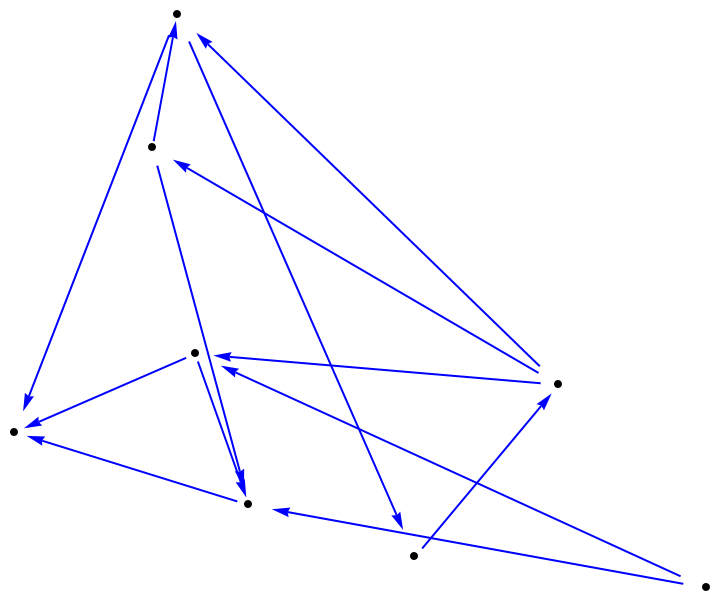

If we have a sequence of edges $e_0,e_1,\ldots,e_{k-1}$ in which the starting node of $e_{i+1}$ is the terminal node of $e_i$ for $i=0,\ldots,k-2$ then we call this a **path** from the starting node of $e_0$ and ending at the terminal node of $e_{k-1}.$

We refer to the number of edges in the path as the **length** of the path.

Below, a path in the above directed graph is show in red.

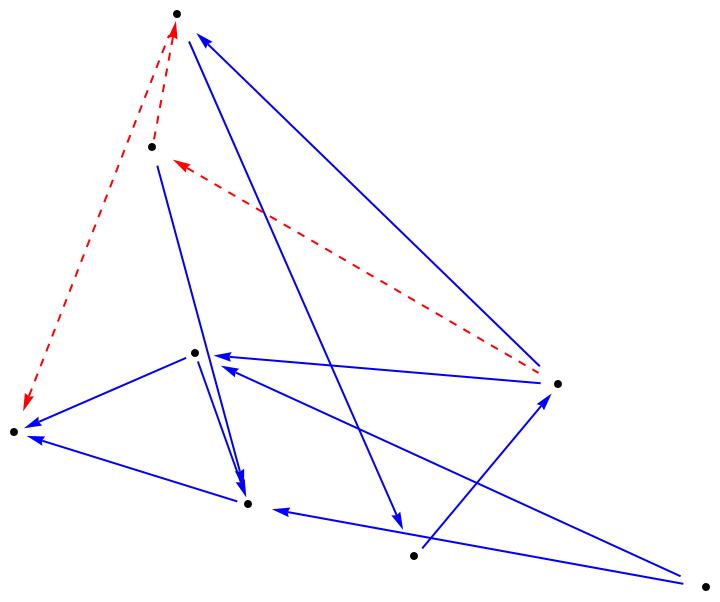

A directed graph forms a **rooted tree** if the following properties hold:

- there is a unique node $n^*$ (called the root node) with the property that for every other node $n$ there exists a unique path starting at $n^*$ and ending at $n$
- there are no cycles, i.e. are no paths starting at a node and ending at the same node


Here's an example of a tree.

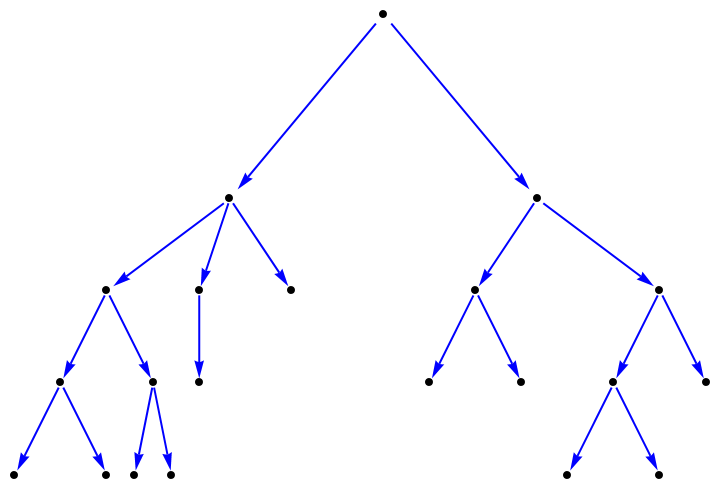

A node in a tree is referred to as 

- a **leaf** if it has no children. 
- a non leaf node is referred to as **internal**.

When there is an arrow from node $m$ to node $n$ we refer to 

- node $m$ as the **parent** of node $n$ and
- node $n$ as a **child** of node $m.$

If there is a path from node $m$ to node $n$ we refer to 

- node $n$ as a **descendant** of node $m,$ and 
- node $m$ as an **ancestor** of node $n.$

Every node in a tree except for the root node has a unique parent, but a parent can have multiple children.

Every node in a tree has the root node as an ancestor and the root node has every node in the tree as a descendant.

Since every node is a descendant of the root node, we can define the **depth** or **level** of a node to be the length of the path from root node to that node. 

The depth of the root node is taken to be 0.

A rooted tree is called a **binary** if each node has at most two children.

**How do rooted trees arise?**

We use rooted trees in a vast number of situations to store information. For example, 

- trees are used to maintain sorted lists
- we use decision trees to store how a decision is to be made
- web pages written in HTML use a tree structure
- XML, a standard for storing data in a text file has a tree structure
- JSON, another standard for storing data in a text file has a tree 
structure


**How are rooted trees implemented?**

To create a rooted tree, we can create a data type (class) called node. 
A node has the following properties:

- the node's parent if there is one, otherwise None if it is a root node
- a list of the node's children
- additional data we wish to store at each node - this could be a dictionary

To construct a node, we'd like to be able to

- pass information about its parent node if that node is to have a parent
- pass data to the node

When a node is created, 

- it's list of children is initialized as an empty list, and
- it is appended to it's parent's child list.

In [2]:
class node:
    def __init__(self,parent=None,data=dict()):
        self.parent=parent
        self.data=data
        self.children=[]
        if parent:
            parent.children.append(self)

**Creating a tree**

To create a tree, we can start with the root node and add child nodes, children of child nodes, etc..
If we follow the rules for tree creation (no cycles!!!) the tree can be identified by its root node.
Let's create the tree shown here:

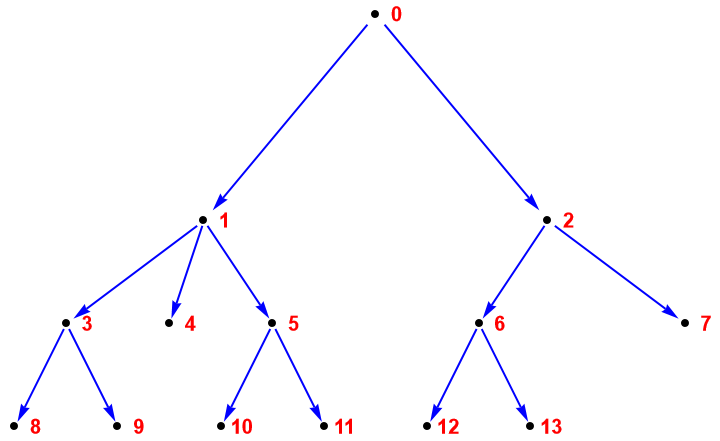

We'll store the label of each node in that node's dictionary.

In [3]:
root=node(data={"label":0})

node1=node(parent=root,data={"label":1})
node2=node(parent=root,data={"label":2})

node3=node(parent=node1,data={"label":3})
node4=node(parent=node1,data={"label":4})
node5=node(parent=node1,data={"label":5})

node6=node(parent=node2,data={"label":6})
node7=node(parent=node2,data={"label":7})

node8=node(parent=node3,data={"label":8})
node9=node(parent=node3,data={"label":9})

node10=node(parent=node5,data={"label":10})
node11=node(parent=node5,data={"label":11})

node12=node(parent=node6,data={"label":12})
node13=node(parent=node6,data={"label":13})

**Print some node information**

In [3]:
node3

In [4]:
node3.data["label"]

3

In [5]:
node3.children

[<__main__.node at 0x1a5765a98e0>, <__main__.node at 0x1a5765a9940>]

In [6]:
[n.data["label"] for n in node3.children]

[8, 9]

**Traversing/Searching a tree**

Remember, we may store any kind of data in each node. 

We might want to 

- visit every node and do something with data at some of the nodes
- search the tree for a node whose data satisfies some property.

A tree search algorithm typically starts at the root node and descends down the tree visiting all of the nodes in some order until reaching a node with  the desired properties.

So in either case we need a strategy for traversing the tree with every node visited.

There are two typical ways for traversing a tree starting from the root node.

- breadth first traversal
- depth first traversal


**Breadth first traversal**

In breadth first traversal, we visit the root node, then all nodes at depth 1, then all nodes at depth 2, and so on.

To implement this, we can use a FIFO  queue. This data structure is a list of objects in which we can successively add items and when we remove the item that was first added to the list. In other words, first-in/first-out (FIFO).

In a separate exercise, one can compare ways if implementing FIFO queues in Python and find that 

- queue is very slow (because it is optimized for multi-threading?)
- deque is very fast
- list is also very fast (adding using append and removing using pop(0)) though not quite as fast as deque

The Python deque can be used package provides such a data structure.

To do breadth first traversal we proceed as follows. Initialize a queue with the root node. Then as long there are nodes in the queue, we

- pop a node from the queue (first node that was added)
- process the popped node
- add the node's children to the queue.

Here, "process the popped node" means

- in the case of search, determine whether it is the node we are looking for and stop traversing if it is
- perform some action using the data at the node (store it, modify it, append to it)

Here is an implementation of breadth first traversal using a list for the FIFO queue. For each node, we node visited we print its label.

Before running the code, make sure you know what order the printed out labels should have.

In [5]:
Q=[root]
while len(Q)>0:
    n=Q.pop(0)
    print(n.data["label"])
    Q.extend(n.children)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


**Breadth first search**

Here is an illustration of a search. Each node's data is given a *status* that is eithe "hay" or "needle". We want to find and return the node whose status is "needle".

In [6]:
root=node(data={"label":0,"status":"hay"})

node1=node(parent=root,data={"label":1,"status":"hay"})
node2=node(parent=root,data={"label":2,"status":"hay"})

node3=node(parent=node1,data={"label":3,"status":"hay"})
node4=node(parent=node1,data={"label":4,"status":"hay"})
node5=node(parent=node1,data={"label":5,"status":"hay"})

node6=node(parent=node2,data={"label":6,"status":"hay"})
node7=node(parent=node2,data={"label":7,"status":"hay"})

node8=node(parent=node3,data={"label":8,"status":"hay"})
node9=node(parent=node3,data={"label":9,"status":"needle"})

node10=node(parent=node5,data={"label":10,"status":"hay"})
node11=node(parent=node5,data={"label":11,"status":"hay"})

node10=node(parent=node6,data={"label":12,"status":"hay"})
node11=node(parent=node6,data={"label":13,"status":"hay"})

In [7]:
Q=[root]
while len(Q)>0:
    n=Q.pop(0)
    if n.data["status"]=="needle":
        break
    Q.extend(n.children)
print("node label = "+str(n.data["label"]))
print("node status = "+n.data["status"])


node label = 9
node status = needle


**Depth first traversal**

In depth first traversal, for each node we visit, we visit its children (and do something with them) before we do something with the node itself.

This means we have a recursive function, one that calls itself.

Here, when we visit a node n, we first visit its children then we perform some action based on the node's data.

In [8]:
def visit(n):
    for c in n.children:
        visit(c)
    print(n.data["label"])
visit(root)

8
9
3
4
10
11
5
1
12
13
6
7
2
0


To understand what's going on:

- we start at the root and first visit it's children
- each time we visit a child c we:
    - visit c's children
    - print the label for c
    
So, for example, when we call visit with node3 as an argument, we
- call visit with node 8 as an argument
    - node 8 has no children so we skip the for loop, and
    - print node 8's label
- call visit with node 9 as an argument
    - node 9 has no children so we skip the for loop, and
    - print node 9's label
- print node 3's label

**Depth first search**

Here's an implementation of depth first search, again for the needle in a haystack.

First we use the traversal algorithm to create the (ordered) list of nodes.

Then we go through that list and search a node's data for a particular key/value pair.

In [9]:
def DFS(node,key,value):
    nodelist=[]
    def visit(n):
        for c in n.children:
            visit(c)
        nodelist.append(n)
    visit(root)
    for n in nodelist:
        if n.data[key]==value:
            return(n)
n=DFS(root,"status","needle")
print(n.data["label"])

9
